In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
results = results.all()
print(results)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temp = pd.DataFrame(results,columns=["June temps"])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temp.describe()


,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
June_temp.round(2).mode()

,June temps
0,76.0


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date)== 12)

In [10]:
# 7. Convert the December temperatures to a list.
#results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
results_list = results.all()
print(results_list)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temp = pd.DataFrame(results,columns=["December Temps"])

In [12]:
# 9Dec_temp = pd.DataFrame(results,columns=["December Temps"]). Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temp.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [36]:
Dec_temp.round(2).mode()

,December Temps
0,71.0


<AxesSubplot:ylabel='Frequency'>

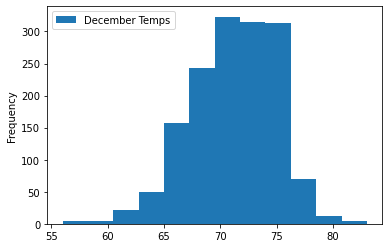

In [13]:
Dec_temp.plot.hist(bins=12)


<AxesSubplot:ylabel='Frequency'>

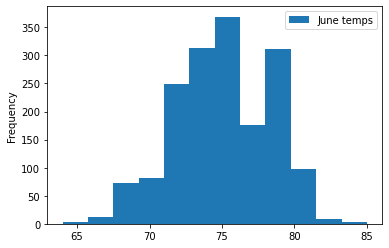

In [14]:
June_temp.plot.hist(bins=12)

In [15]:
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date) == 6).all()
results

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [16]:
June_prcp = pd.DataFrame(results, columns=['date','precipitation'])
June_prcp.head(15)

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
5,2010-06-06,0.00
6,2010-06-07,0.00
7,2010-06-08,0.00
8,2010-06-09,0.00
9,2010-06-10,0.00


In [17]:
June_prcp.set_index(June_prcp['date'], inplace=True)
print(June_prcp)

                  date  precipitation
date                                 
2010-06-01  2010-06-01           0.00
2010-06-02  2010-06-02           0.01
2010-06-03  2010-06-03           0.00
2010-06-04  2010-06-04           0.00
2010-06-05  2010-06-05           0.00
...                ...            ...
2017-06-26  2017-06-26           0.02
2017-06-27  2017-06-27           0.10
2017-06-28  2017-06-28           0.02
2017-06-29  2017-06-29           0.04
2017-06-30  2017-06-30           0.20

[1700 rows x 2 columns]


In [18]:
print(June_prcp.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-06           0.00
2010-06-07           0.00
2010-06-08           0.00
2010-06-09           0.00
2010-06-10           0.00
2010-06-11           0.00
2010-06-12           0.00
2010-06-13           0.00
2010-06-14           0.00
2010-06-15           0.00
2010-06-16           0.00
2010-06-17           0.00
2010-06-18           0.00
2010-06-19           0.00
2010-06-20           0.00
2010-06-21           0.00
2010-06-22           0.00
2010-06-23           0.00
2010-06-24           0.00
2010-06-25           0.00
2010-06-26           0.02
2010-06-27           0.00
2010-06-28           0.00
2010-06-29           0.00
2010-06-30           0.00
2011-06-01           0.07
2011-06-02           0.00
2011-06-03           0.56
2011-06-04           0.89
2011-06-05           0.00
2011-06-06           0.00
2011-06-07           0.00
2011-06-08  

In [19]:
June_prcp = June_prcp.sort_index()
June_prcp

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,0.01
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,NaN
2010-06-01,2010-06-01,0.03
...,...,...
2017-06-30,2017-06-30,0.01
2017-06-30,2017-06-30,0.08
2017-06-30,2017-06-30,0.07


In [20]:
print(June_prcp.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-01           0.01
2010-06-01           0.00
2010-06-01            NaN
2010-06-01           0.03
2010-06-01           0.00
2010-06-01           0.00
2010-06-01           0.08
2010-06-01           0.03
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.10
2010-06-03           0.00
2010-06-03           0.14
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.01
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-05  

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '2016-06-22'),
  Text(0.0, 0, '2010-06-01'),
  Text(250.0, 0, '2011-06-02'),
  Text(500.0, 0, '2012-06-05'),
  Text(750.0, 0, '2013-06-10'),
  Text(1000.0, 0, '2014-06-14'),
  Text(1250.0, 0, '2015-06-21'),
  Text(1500.0, 0, '2016-06-29'),
  Text(1750.0, 0, ''),
  Text(2000.0, 0, '')])

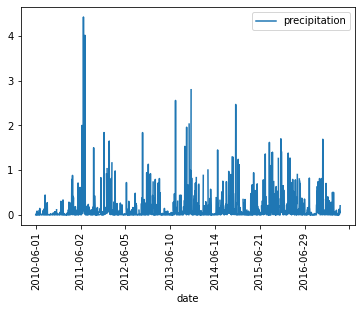

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
June_prcp.plot()
plt.xticks(rotation=90)

In [22]:
June_prcp.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [23]:
#results = session.query(Measurement.prcp).\
#filter(extract('month', Measurement.date) == 12).all()
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date) == 12).all()
results

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [24]:
Dec_prcp = pd.DataFrame(results, columns=['date','precipitation'])
Dec_prcp.head(15)

,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
5,2010-12-08,0.00
6,2010-12-09,0.00
7,2010-12-10,1.58
8,2010-12-11,0.77
9,2010-12-12,0.00


In [25]:
#Dec_prcp.set_index(Dec_prcp['Measurement.date'], inplace=True)
#print(Dec_prcp)
Dec_prcp.set_index(Dec_prcp['date'], inplace=True)
print(Dec_prcp)

                  date  precipitation
date                                 
2010-12-01  2010-12-01           0.04
2010-12-03  2010-12-03           0.00
2010-12-04  2010-12-04           0.00
2010-12-06  2010-12-06           0.00
2010-12-07  2010-12-07           0.00
...                ...            ...
2016-12-27  2016-12-27           0.14
2016-12-28  2016-12-28           0.14
2016-12-29  2016-12-29           1.03
2016-12-30  2016-12-30           2.37
2016-12-31  2016-12-31           0.90

[1517 rows x 2 columns]


In [26]:
print(Dec_prcp.to_string(index=False))

      date  precipitation
2010-12-01           0.04
2010-12-03           0.00
2010-12-04           0.00
2010-12-06           0.00
2010-12-07           0.00
2010-12-08           0.00
2010-12-09           0.00
2010-12-10           1.58
2010-12-11           0.77
2010-12-12           0.00
2010-12-13           0.00
2010-12-14           0.00
2010-12-15           0.00
2010-12-16           0.00
2010-12-17           0.00
2010-12-18           0.00
2010-12-19           1.40
2010-12-23           0.00
2010-12-24           0.00
2010-12-26            NaN
2010-12-27           0.13
2010-12-28           0.55
2010-12-29           0.06
2010-12-30           0.01
2010-12-31           0.00
2011-12-01           0.03
2011-12-02           0.08
2011-12-03           0.00
2011-12-04           0.00
2011-12-05           0.00
2011-12-06           0.00
2011-12-07           0.00
2011-12-08           0.00
2011-12-09           0.13
2011-12-10           0.07
2011-12-11           0.07
2011-12-12           0.08
2011-12-13  

In [27]:
# Sort the dataframe by date
Dec_prcp = Dec_prcp.sort_index()
Dec_prcp

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,0.70
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,1.35
...,...,...
2016-12-31,2016-12-31,0.25
2016-12-31,2016-12-31,0.36
2016-12-31,2016-12-31,0.01


In [28]:
print(Dec_prcp.to_string(index=False))

      date  precipitation
2010-12-01           0.04
2010-12-01           0.03
2010-12-01           0.70
2010-12-01           0.03
2010-12-01           1.35
2010-12-01           0.13
2010-12-01           1.48
2010-12-01           0.76
2010-12-02            NaN
2010-12-02           0.16
2010-12-02           0.06
2010-12-02           0.26
2010-12-02           0.00
2010-12-02           0.13
2010-12-02           0.02
2010-12-02           0.18
2010-12-03           1.59
2010-12-03           0.01
2010-12-03           0.78
2010-12-03           0.00
2010-12-03           0.22
2010-12-03           0.01
2010-12-03           0.47
2010-12-03           0.16
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.19
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05            NaN
2010-12-05  

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '2016-12-01'),
  Text(0.0, 0, '2010-12-01'),
  Text(200.0, 0, '2010-12-27'),
  Text(400.0, 0, '2011-12-23'),
  Text(600.0, 0, '2012-12-20'),
  Text(800.0, 0, '2013-12-17'),
  Text(1000.0, 0, '2014-12-12'),
  Text(1200.0, 0, '2015-12-11'),
  Text(1400.0, 0, '2016-12-13'),
  Text(1600.0, 0, '')])

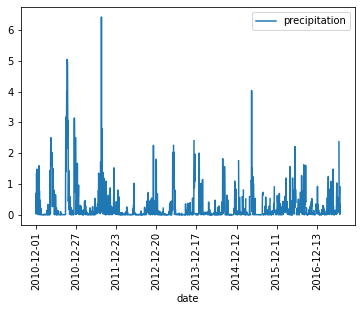

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
Dec_prcp.plot()
plt.xticks(rotation=90)

In [37]:
Dec_prcp.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [38]:
#Write a query that filters the Measurement table to retrieve the temperatures for the month of December for the monst active station
results = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date)== 12).\
    filter(Measurement.station == 'USC00519281') 